# ABC-SMC Outputs analysis

This notebook will take a look at the results from the ABC-SMC script.

---

## Libraries and data importation

In [14]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('paper')

# Data 
particles = pd.read_csv('results/particles.csv')
tracking = pd.read_csv('results/tracking.csv')


particles.drop(columns={'Unnamed: 0'},inplace=True)
particles.sort_values(by='gen',ascending=False,inplace=True)
particles['gen'] = particles['gen'].astype(str)

## Visualization of results

We will make a ridgeplot for each parameter.

##  betaInP

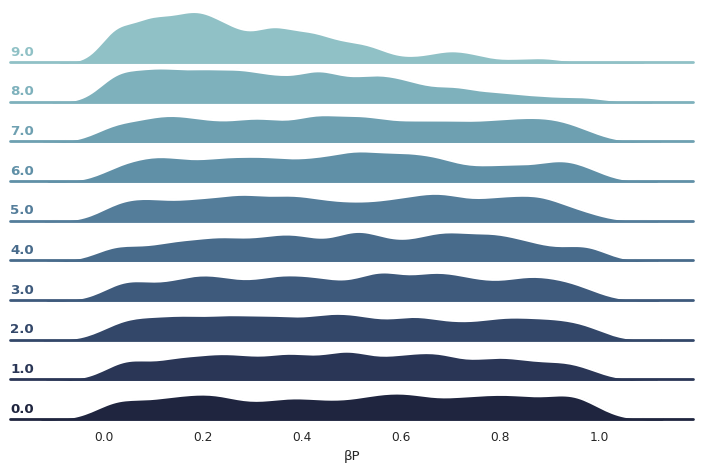

In [2]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(particles, row="gen", hue="gen", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "betaInP",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "betaInP", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "gen")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlabel="βP")
g.despine(bottom=True, left=True)

##  Omega

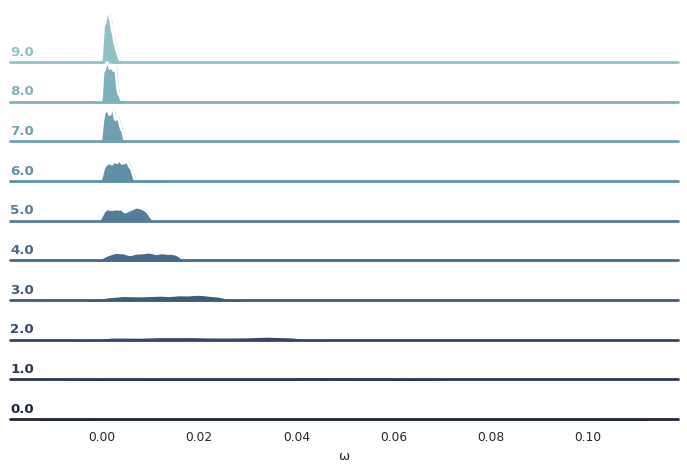

In [3]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(particles, row="gen", hue="gen", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "omega",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "omega", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "gen")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xlabel="ω")
g.despine(bottom=True, left=True)

## Posterior and value we look for 

We will now plot the posterior values obtained by the inference method, and the value we were looking for as a dashed line.

[Text(0.5, 0, 'βP'), Text(0, 0.5, 'Density')]

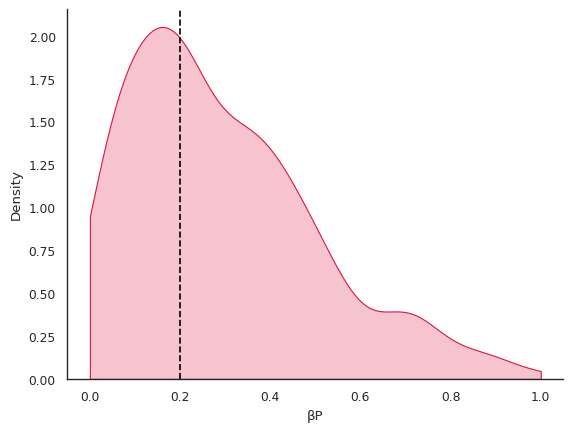

In [10]:
post = particles.query("gen=='9.0'")

fig = sns.kdeplot(post['betaInP'],color='crimson',fill=True, clip=(0.0,1.0))
sns.despine()
plt.axvline(0.2,color='black',linestyle='--')
fig.set(xlabel="βP", ylabel="Density")

[Text(0.5, 0, 'ω'), Text(0, 0.5, 'Density')]

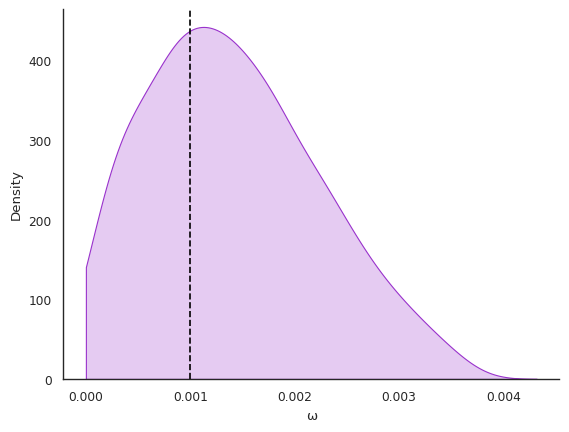

In [9]:
fig = sns.kdeplot(post['omega'],color='darkorchid',fill=True,clip=(0.0,0.1))
sns.despine()
plt.axvline(0.001,color='black',linestyle='--')
fig.set(xlabel="ω", ylabel="Density")

## Tracking

Here, we plot the value for epsilon at each generation, and the total number of attempts we have made.

In [15]:
tracking.drop(columns={'Unnamed: 0'},inplace=True)
tracking

,gen,acc_parc,tot_att,eps
0,1,500,500,0.0
1,2,500,800,14828598.8
2,3,500,996,9793817.0
3,4,500,1022,5674155.6
4,5,500,933,3146101.4
5,6,500,1016,1770686.6
6,7,500,1013,1168522.0
7,8,500,1110,938281.8
8,9,500,1055,879133.2
9,10,500,1372,843764.8


[Text(0.5, 0, 'Generation'), Text(0, 0.5, 'ϵ')]

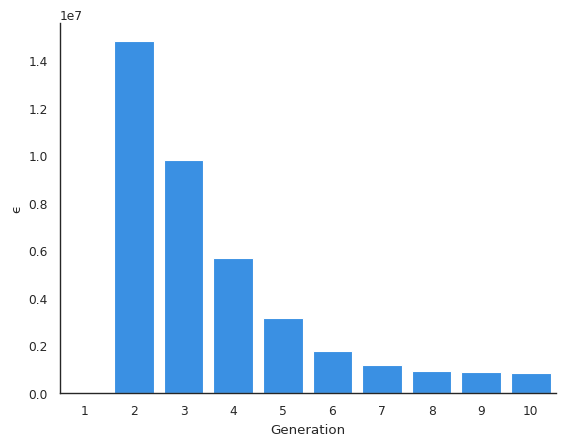

In [17]:
ax = sns.barplot(y=tracking['eps'],x=tracking['gen'], color='dodgerblue')
sns.despine()
ax.set(xlabel="Generation", ylabel="ϵ")

[Text(0.5, 0, 'Generation'), Text(0, 0.5, 'Number of runs')]

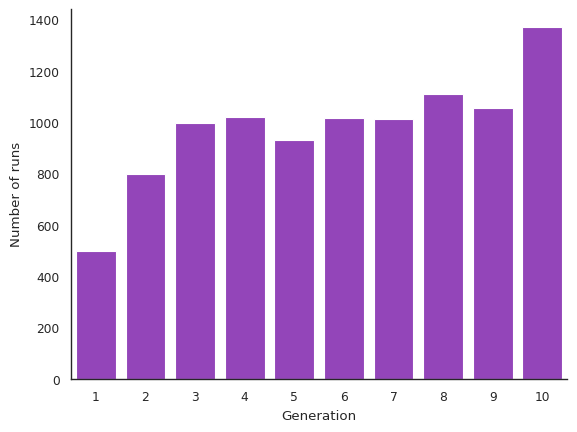

In [18]:
fig = sns.barplot(y=tracking['tot_att'],x=tracking['gen'],color='darkorchid')
sns.despine()
fig.set(xlabel="Generation",ylabel="Number of runs")